In [6]:
from tensor import Tensor
import numpy as np
import nn
import torch
from sklearn import datasets

In [7]:
import datasets
import dataloader

In [8]:
from torchvision import datasets

In [9]:
from torchvision import datasets
from torchvision.transforms import ToTensor

from torch.utils.data import DataLoader

In [10]:
train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor())

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [11]:
train_dataloader = DataLoader(
    train_data,
    batch_size=64,
    shuffle=True
)

test_dataloader = DataLoader(
    test_data,
    batch_size=64,
    shuffle=True
)

In [19]:
for x, y in train_dataloader:
    print(x.max())

tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)

In [7]:
import torch.nn.functional as F

In [42]:
print(train_data.data.max())

tensor(255, dtype=torch.uint8)


In [9]:
MNIST_DATA_NUMPY = train_data.data.numpy()
MNIST_LABELS_NUMPY = train_data.targets.numpy()

In [9]:
from dataloader import DataLoader

In [10]:
from datasets import Dataset
from dataloader import DataLoader

class MNISTDataset(Dataset):
    def __init__(self, data_array, labels):
        self.dataset = data_array
        self.labels = labels
        
    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, index):
        data = self.dataset[index]
        labels = self.labels[index]
        return Tensor(data), Tensor(labels, dtype=np.int32)

nano_data = MNISTDataset(MNIST_DATA_NUMPY, MNIST_LABELS_NUMPY)
mnist_loader = DataLoader(nano_data, batch_size=64, shuffle=True)

In [12]:
import torch.nn as nn

class MLPTorch(nn.Module):
    
    def __init__(self, num_input, num_output):
        super().__init__()
        self.layer_1 = nn.Linear(num_input, 512)
        self.layer_2 = nn.Linear(512, 512)
        self.layer_3 = nn.Linear(512, num_output)
        
    def forward(self, x):
        x = self.layer_1(x.flatten(1)).relu()
        x = self.layer_2(x).relu()
        x = self.layer_3(x)
        return x

In [6]:
EPOCHS = 10

In [13]:
model = MLPTorch(28*28, 10)

loss_fn = torch.nn.CrossEntropyLoss()
optim = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [20]:
train_dataloader.batch_size

64

In [35]:
train_dataloader.dataset.data.size()[0]

60000

In [47]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [21]:
model = MLPTorch(28*28, 10)
EPOCHS = 10
loss_fn = torch.nn.CrossEntropyLoss()
optim = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

total_items = train_dataloader.dataset.data.size()[0] / train_dataloader.batch_size

for epoch in range(EPOCHS):
    total_train_loss = 0
    print(f"EPOCH {epoch + 1}")
    for i, (x, y) in enumerate(train_dataloader):
        x *= 255
        optim.zero_grad()
        pred = model(x)
        loss = loss_fn(pred, y)
        if i % 100 == 0:
            print(f"STEP {i}: loss: {loss.item()}")
        loss.backward()
        optim.step()
        total_train_loss += loss.item()
    print("AVG LOSS: ", total_train_loss / total_items)
        

EPOCH 1
STEP 0: loss: 18.2470645904541
STEP 100: loss: 2.2898802757263184
STEP 200: loss: 2.2928245067596436
STEP 300: loss: 2.3012189865112305
STEP 400: loss: 2.2927191257476807
STEP 500: loss: 2.300537109375
STEP 600: loss: 2.292175769805908
STEP 700: loss: 2.296680212020874
STEP 800: loss: 2.311771869659424
STEP 900: loss: 2.2965590953826904
AVG LOSS:  125653.92261972174
EPOCH 2
STEP 0: loss: 2.301868200302124
STEP 100: loss: 2.297043800354004
STEP 200: loss: 2.3195114135742188
STEP 300: loss: 2.3101446628570557
STEP 400: loss: 2.306162118911743
STEP 500: loss: 2.3022921085357666
STEP 600: loss: 2.292564630508423
STEP 700: loss: 2.306847095489502
STEP 800: loss: 2.2947630882263184
STEP 900: loss: 2.290712356567383
AVG LOSS:  2.3028333712259927
EPOCH 3
STEP 0: loss: 2.3072876930236816
STEP 100: loss: 2.291332244873047
STEP 200: loss: 2.3125734329223633
STEP 300: loss: 2.298501491546631
STEP 400: loss: 2.295417308807373
STEP 500: loss: 2.305154800415039
STEP 600: loss: 2.2918612957000

In [22]:
def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    print(num_batches)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            X *= 255
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [27]:
np.ceil(10000 / 64)

157.0

In [23]:
test_loop(test_dataloader, model, loss_fn)

157
Test Error: 
 Accuracy: 10.3%, Avg loss: 2.301301 



In [63]:
dummy = torch.randn(10, 28, 28)

In [64]:
dummy.flatten(1).size()

torch.Size([10, 784])

In [65]:
model = MLPTorch(28*28, 10)

torch.Size([10, 28, 28])


tensor([[-0.0232,  0.0194, -0.0318, -0.0353, -0.1938, -0.0837, -0.1184, -0.2372,
         -0.1115,  0.0053],
        [ 0.0622,  0.0311, -0.0318, -0.0962, -0.0816, -0.0509, -0.0692, -0.1975,
          0.0434,  0.0465],
        [-0.1591,  0.1465, -0.1142, -0.0677, -0.1329, -0.0687,  0.0468, -0.0051,
         -0.0197, -0.0347],
        [-0.0403,  0.0543, -0.0114, -0.0193, -0.1147, -0.0528, -0.0598, -0.0489,
         -0.0483,  0.0926],
        [-0.1176, -0.0189, -0.0337, -0.0534, -0.1033, -0.0617, -0.0092, -0.0457,
          0.0512,  0.0165],
        [-0.0781, -0.0003, -0.0652, -0.0910, -0.1181, -0.1104, -0.0648, -0.1068,
         -0.0808, -0.0345],
        [-0.0383,  0.1365, -0.0366, -0.1716, -0.0395, -0.1997, -0.2151, -0.0797,
         -0.0064,  0.1109],
        [ 0.0519, -0.0624, -0.0559, -0.0032, -0.1382, -0.1285,  0.0707, -0.0853,
         -0.0356,  0.0968],
        [ 0.0958,  0.0004,  0.0463, -0.1408, -0.0930, -0.0834, -0.0446, -0.1864,
          0.0991, -0.0430],
        [ 0.1359,  

In [13]:
import nn
from tensor import Tensor

In [21]:
import nn
from tensor import Tensor

from datasets import Dataset
from dataloader import DataLoader

class MNISTDataset(Dataset):
    def __init__(self, data_array, labels):
        self.dataset = data_array
        self.labels = labels
        
    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, index):
        data = self.dataset[index]
        labels = self.labels[index]
        return Tensor(data), Tensor(labels, dtype=np.int32)

nano_data = MNISTDataset(MNIST_DATA_NUMPY, MNIST_LABELS_NUMPY)
mnist_loader = DataLoader(nano_data, batch_size=64, shuffle=True)

In [17]:
class MLPNano(nn.Module):
    def __init__(self, num_input, num_output):
        self.layer_1 = nn.Linear(num_input, 512)
        self.layer_2 = nn.Linear(512, 512)
        self.layer_3 = nn.Linear(512, num_output)
    def forward(self, x):
        x = self.layer_1(x.flatten(1)).relu()
        x = self.layer_2(x).relu()
        x = self.layer_3(x)
        return x

In [15]:
MNIST_DATA_NUMPY.shape

(60000, 28, 28)

In [13]:
for a, b in mnist_loader:
    print(a.shape)
    break

(64, 28, 28)


In [4]:
import numpy as np
import time


from torchvision import datasets
from torchvision.transforms import ToTensor

from torch.utils.data import DataLoader
train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor())
train_dataloader = DataLoader(
    train_data,
    batch_size=64,
    shuffle=True
)

# def test_loop(dataloader, model, loss_fn):
#     # Set the model to evaluation mode - important for batch normalization and dropout layers
#     size = len(dataloader.dataset)
#     num_batches = len(dataloader)
#     test_loss, correct = 0, 0

#     # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
#     # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
#     with torch.no_grad():
#         for X, y in dataloader:
#             pred = model(X)
#             test_loss += loss_fn(pred, y).item()
#             correct += (pred.argmax(1) == y).type(torch.float).sum().item()

#     test_loss /= num_batches
#     correct /= size
#     print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


MNIST_DATA_NUMPY = train_data.data.numpy() / 255
MNIST_LABELS_NUMPY = train_data.targets.numpy()


import nn
from tensor import Tensor

from datasets import Dataset
from dataloader import DataLoader

class MNISTDataset(Dataset):
    def __init__(self, data_array, labels):
        self.dataset = data_array
        self.labels = labels
        
    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, index):
        data = self.dataset[index]
        labels = self.labels[index]
        return Tensor(data), Tensor(labels, dtype=np.int32)

nano_data = MNISTDataset(MNIST_DATA_NUMPY, MNIST_LABELS_NUMPY)
mnist_loader = DataLoader(nano_data, batch_size=64, shuffle=True)


class MLPNano(nn.Module):
    
    def __init__(self, num_input, num_output):
        self.layer_1 = nn.Linear(num_input, 512)
        self.layer_2 = nn.Linear(512, 512)
        self.layer_3 = nn.Linear(512, num_output)
        
    def forward(self, x):
        x = self.layer_1(x.flatten(1)).relu()
        x = self.layer_2(x).relu()
        x = self.layer_3(x).relu()
        return x

EPOCHS = 10

dummy = Tensor.randn((10, 1, 28, 28))
model = MLPNano(28*28, 10)
optim = nn.SGD(model.parameters(), lr=0.01, momentum=0.9)
loss_fn = nn.CrossEntropyLoss()

start_time = time.time() 
total_items = train_dataloader.dataset.data.size()[0] / train_dataloader.batch_size
print(total_items)
for epoch in range(EPOCHS):
    print(f"EPOCH: {epoch+1}")
    total_train_loss = 0
    for i , (x, y) in enumerate(mnist_loader):
        optim.zero_grad()
        pred = model(x)
        loss = loss_fn(pred, y)
        loss.backward()
        optim.step()
        total_train_loss += loss.item()
    print("AVG LOSS:", total_train_loss / total_items)
    print("\n")


end_time = time.time()  # Record the end time
elapsed_time = end_time - start_time  # Calculate the elapsed time   

print("TIME:", elapsed_time)

937.5
EPOCH: 1
AVG LOSS: 0.49842444287935894


EPOCH: 2
AVG LOSS: 0.33594805908203124


EPOCH: 3
AVG LOSS: 0.3010612559914589


EPOCH: 4
AVG LOSS: 0.0908853342935443


EPOCH: 5
AVG LOSS: 0.045134065474073094


EPOCH: 6
AVG LOSS: 0.03298274559279283


EPOCH: 7
AVG LOSS: 0.025991431546459595


EPOCH: 8
AVG LOSS: 0.01878465625386064


EPOCH: 9
AVG LOSS: 0.01475584541761006


EPOCH: 10
AVG LOSS: 0.011574254630164553


TIME: 54.43138313293457


In [5]:
from dataloader import DataLoader

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

MNIST_DATA_NUMPY = test_data.data.numpy() / 255
MNIST_LABELS_NUMPY = test_data.targets.numpy()

test_data = MNISTDataset(MNIST_DATA_NUMPY, MNIST_LABELS_NUMPY)
test_loader = DataLoader(nano_data, batch_size=64, shuffle=True)

def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = 60000 / 64 #len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    for X, y in dataloader:
        pred = model(X)
        test_loss += loss_fn(pred, y).item()
        correct += (pred.argmax(1) == y).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


test_loop(test_loader, model, loss_fn)

Test Error: 
 Accuracy: 99.9%, Avg loss: 0.007821 



In [4]:
class MLP(nn.Module):
    def __init__(self):
        self.fc1 = Linear(28 * 28, 256)
        self.fc2 = Linear(256, 256)  # Second hidden layer, 256 neurons
        self.output = Linear(256, 10)  # Output layer, 10 classes

    def forward(self, x):
        x = self.fc1(x).relu()
        x = self.fc2(x).relu()
        x = self.output(x)
        return x

In [6]:
# Initialize dataset and dataloader
train_dataset = datasets.MNIST(root='mnist_data', train=True)
test_dataset = datasets.MNIST(root='mnist_data', train=False)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

Downloaded train-images-idx3-ubyte.gz
Downloaded train-labels-idx1-ubyte.gz
Downloaded t10k-images-idx3-ubyte.gz
Downloaded t10k-labels-idx1-ubyte.gz


BadGzipFile: Not a gzipped file (b'<!')

In [3]:
## Does it work in simple contexts?

xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]

ys = [[1.0], 
      [-1.0], 
      [-1.0], 
      [1.0]]



net = nn.MLP()

optim = nn.SGD(net.parameters(), lr=0.005, momentum=0.9)

x = Tensor(xs)
y_real = Tensor(ys)

for k in range(10000):
    optim.zero_grad()
    y_pred = net(x)
    loss = ((y_pred - y_real)**2).mean(0)
    loss.backward()
    optim.step()
    if k % 200 == 0:
        print(k, loss.data)
    
y_pred

TypeError: MLP.__init__() missing 2 required positional arguments: 'n_in' and 'n_out'

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles


In [3]:
from sklearn import datasets

In [11]:
datasets.make_regression(n_samples=200, n_features=2, noise=0.01)

(array([[-0.37988947,  0.05099247],
        [ 0.58493451, -0.798081  ],
        [ 1.04167054,  0.74203373],
        [-2.86375784,  0.58412593],
        [ 1.03509501,  0.47722211],
        [ 0.537244  ,  1.18953602],
        [ 0.59130794, -0.73619249],
        [ 0.34538168, -0.0382666 ],
        [-1.11921492,  1.06750063],
        [ 0.88444262,  1.47938184],
        [-0.02414129,  0.74867554],
        [-0.69657555, -0.86273344],
        [-2.35665649,  0.42522904],
        [ 1.300929  , -2.67400544],
        [-2.37987777,  0.01012245],
        [-0.82709791, -1.7800778 ],
        [-1.37558475, -0.40835085],
        [-1.09512129, -1.5971113 ],
        [-1.50145152, -0.8248431 ],
        [ 0.12458102, -1.38277224],
        [ 0.8473867 ,  0.84127458],
        [ 0.69786211, -0.50552855],
        [ 0.58246639, -0.2890588 ],
        [ 0.79505177,  0.32554748],
        [ 0.56900632,  0.2725109 ],
        [ 1.33618627,  0.30505305],
        [ 0.09898389, -0.18741819],
        [-0.11827806,  0.007

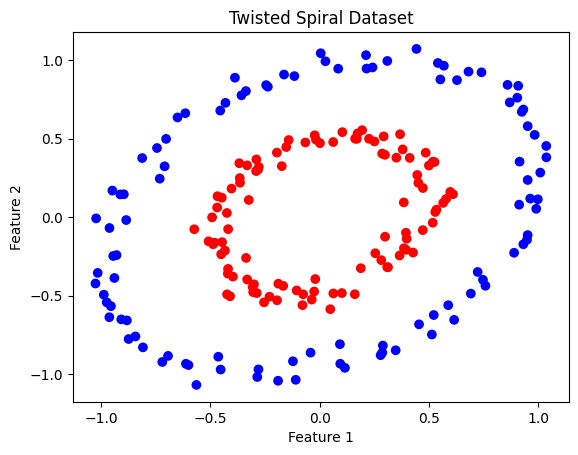

NameError: name 'Tensor' is not defined

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

def generate_twisted_spiral(n_samples, noise=0.05, factor=0.5):
    """
    Generates a spiral dataset using the make_circles function from scikit-learn,
    then 'twists' it to resemble a spiral.
    :param n_samples: int, total number of points
    :param noise: float, standard deviation of Gaussian noise
    :param factor: float, scale factor between inner and outer circle
    :return: tuple, features (X) and labels (y)
    """
    X, y = make_circles(n_samples=n_samples, factor=factor, noise=noise, random_state=42)
    Y = y * 2 - 1  # Adjust labels to be -1 and 1

    # Apply a transformation to twist the circles into spirals
    transformation = np.array([[0.6, -0.6], [0.8, 0.8]])
    X = np.dot(X, transformation)

    return X, Y

# Generate the data
n_samples = 200
X, Y = generate_twisted_spiral(n_samples)

# Plotting the dataset
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.bwr)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Twisted Spiral Dataset")
plt.show()

# Convert the data for your neural network
xs = X.tolist()
ys = [[y] for y in Y.tolist()]


x = Tensor(xs)
y_real = Tensor(ys)

In [3]:
y_real.shape

(200, 1)

In [64]:
def kaiming_uniform(shape, gain=np.sqrt(2)):
    """
    Kaiming Uniform initialization (He initialization) for weight matrices.

    Args:
    shape (tuple): The shape of the weight matrix.
    gain (float): The scaling factor (recommended sqrt(2) for ReLU).

    Returns:
    numpy.ndarray: The initialized weights.
    """
    print(shape[:-1])
    fan_in = np.prod(shape[:-1])  # Product of dimensions except the last dimension
    std = gain / np.sqrt(fan_in)  # Calculate standard deviation
    limit = np.sqrt(3.0) * std  # Calculate limit for uniform distribution

    return np.random.uniform(-limit, limit, size=shape)

In [65]:
kaiming_uniform((1, 30)).std()

(1,)


1.3609795497380417

In [58]:
div = 1. / np.sqrt(1)

np.random.uniform(-div, div, (30, 1)).std()

0.5480296227365216

In [42]:
def kaiming_uniform_np(in_features, out_features):
    tensor = torch.empty(out_features, in_features)
    torch.nn.init.kaiming_uniform_(tensor, a=0)
    return tensor

kaiming_uniform_np(1, 30).std()

tensor(1.3837)

In [24]:
Tensor.kaiming_uniform(1, 30).data.std()

2.0763154

In [45]:
torch.nn.Linear(1, 30).weight.data.std()

tensor(0.6320)

In [2]:
import torch

In [8]:
X, y = datasets.make_regression(n_samples=200, n_features=1, noise=0.01)
y.reshape(-1, 1)

array([[ 1.34808479e+01],
       [ 1.95015536e+01],
       [ 9.26908849e+00],
       [-7.11581725e+01],
       [ 3.82720009e+01],
       [-2.02885994e+01],
       [-4.51040988e+01],
       [-2.99703446e+00],
       [-5.36353356e+01],
       [ 2.99604916e+01],
       [ 2.50319926e+01],
       [ 1.04251160e+01],
       [ 2.14645088e+01],
       [-1.32464234e+01],
       [ 6.29139272e+01],
       [ 9.49373062e+01],
       [ 2.41986366e+00],
       [ 2.49414707e+01],
       [ 5.90874473e+01],
       [-1.32988455e+01],
       [-4.08545268e+01],
       [ 5.01039319e+01],
       [ 9.43388459e+01],
       [ 1.31495079e+01],
       [ 2.87668639e+01],
       [-8.99283457e+01],
       [ 5.16602512e+01],
       [-8.32871601e+01],
       [ 2.80392787e+01],
       [-5.47252391e+01],
       [ 4.75007538e+00],
       [ 1.42287816e+01],
       [-3.92285690e+01],
       [ 3.04828626e+01],
       [-4.81688788e+01],
       [ 2.85847082e+00],
       [ 1.83038978e+01],
       [ 4.37668251e+01],
       [-1.2

In [7]:
import nn
from tensor import Tensor
# Generate the data
# n_samples = 200
X, y = datasets.make_regression(n_samples=1000, n_features=10,n_targets=10, noise=0.01)
import time
class MLP(nn.Module):
    def __init__(self):
        self.fc1 = nn.Linear(10, 256)
        self.fc2 = nn.Linear(256, 256) # Second hidden layer, 64 neurons
        self.output = nn.Linear(256, 10) # Output layer, 1 output value

    def forward(self, x):
        x = self.fc1(x).relu()
        x = self.fc2(x).relu()
        x = self.output(x)
        return x

model = MLP()
optim = nn.SGD(model.parameters(), lr=0.001, momentum=0.9)
loss_fn = nn.MSELoss()

x = Tensor(X)
y_real = Tensor(y)#.reshape(-1, 1)

epochs = 1000
start_time = time.time() 
for epoch in range(epochs):
    y_pred = model(x)
    loss = loss_fn(y_pred, y_real)

    optim.zero_grad()
    loss.backward()
    optim.step()
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.data}')
end_time = time.time()  # Record the end time
elapsed_time = end_time - start_time  # Calculate the elapsed time   

print(elapsed_time)

Epoch [10/1000], Loss: 29660.294921875
Epoch [20/1000], Loss: 20521.984375
Epoch [30/1000], Loss: 6815.00341796875
Epoch [40/1000], Loss: 1922.5445556640625
Epoch [50/1000], Loss: 1664.8763427734375
Epoch [60/1000], Loss: 846.9177856445312
Epoch [70/1000], Loss: 351.31817626953125
Epoch [80/1000], Loss: 180.38546752929688
Epoch [90/1000], Loss: 93.06334686279297
Epoch [100/1000], Loss: 54.68891143798828
Epoch [110/1000], Loss: 42.119869232177734
Epoch [120/1000], Loss: 32.17827606201172
Epoch [130/1000], Loss: 23.82933235168457
Epoch [140/1000], Loss: 18.044002532958984
Epoch [150/1000], Loss: 14.715387344360352
Epoch [160/1000], Loss: 12.667859077453613
Epoch [170/1000], Loss: 11.18124008178711
Epoch [180/1000], Loss: 10.054296493530273
Epoch [190/1000], Loss: 9.173721313476562
Epoch [200/1000], Loss: 8.458874702453613
Epoch [210/1000], Loss: 7.865475177764893
Epoch [220/1000], Loss: 7.3598127365112305
Epoch [230/1000], Loss: 6.919821739196777
Epoch [240/1000], Loss: 6.534282684326172

In [4]:
a = np.random.randn(200, 1)  
b = np.random.randn(200, )

a += b

ValueError: non-broadcastable output operand with shape (200,1) doesn't match the broadcast shape (200,200)

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import time
from sklearn import datasets

X, y = datasets.make_regression(n_samples=1000, n_features=10, n_targets=10, noise=0.01)
print(y.shape)

grads = []
# Define the neural network architecture
class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(10, 256)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(256, 256)
        self.output = nn.Linear(256, 10)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.output(x)
        return x

# Initialize the network
net = SimpleMLP()

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Example training loop
def train(model, criterion, optimizer, x_train, y_train, epochs=100):
    model.train()
    start_time = time.time() 
    for epoch in range(epochs):
        inputs = torch.tensor(x_train, dtype=torch.float32)
        targets = torch.tensor(y_train, dtype=torch.float32)
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
    end_time = time.time()
    diff = end_time - start_time
    print(diff)

# Assuming you have `xs` and `ys` from your dataset
train(net, criterion, optimizer, X, y, epochs=1000)
# plt.plot(np.arange(0, len(grads), 1), grads)

(1000, 10)
Epoch [10/1000], Loss: 28299.5938
Epoch [20/1000], Loss: 9023.1807
Epoch [30/1000], Loss: 2652.9724
Epoch [40/1000], Loss: 1187.3018
Epoch [50/1000], Loss: 514.5989
Epoch [60/1000], Loss: 186.0085
Epoch [70/1000], Loss: 103.5073
Epoch [80/1000], Loss: 57.4446
Epoch [90/1000], Loss: 35.7552
Epoch [100/1000], Loss: 22.7661
Epoch [110/1000], Loss: 17.5981
Epoch [120/1000], Loss: 15.4110
Epoch [130/1000], Loss: 13.2682
Epoch [140/1000], Loss: 11.4617
Epoch [150/1000], Loss: 9.8916
Epoch [160/1000], Loss: 8.5199
Epoch [170/1000], Loss: 7.4321
Epoch [180/1000], Loss: 6.6498
Epoch [190/1000], Loss: 6.1097
Epoch [200/1000], Loss: 5.7118
Epoch [210/1000], Loss: 5.3878
Epoch [220/1000], Loss: 5.1087
Epoch [230/1000], Loss: 4.8652
Epoch [240/1000], Loss: 4.6494
Epoch [250/1000], Loss: 4.4557
Epoch [260/1000], Loss: 4.2799
Epoch [270/1000], Loss: 4.1198
Epoch [280/1000], Loss: 3.9730
Epoch [290/1000], Loss: 3.8377
Epoch [300/1000], Loss: 3.7124
Epoch [310/1000], Loss: 3.5958
Epoch [320/

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, n_clusters_per_class=1, random_state=42)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)
print(y_train.shape)


class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 16)
        self.fc2 = nn.Linear(16, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

# Initialize the model, loss function, and optimizer
input_dim = X_train.shape[1]
model = SimpleNN(input_dim)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


num_epochs = 500

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

model.eval()
with torch.no_grad():
    outputs = model(X_test)
    predicted = outputs.round()
    # accuracy = (predicted.eq(y_test).sum().item()) / y_test.size(0)
    accuracy = (predicted == y_test).sum().item() / y_test.size(0)
    print(f'Accuracy: {accuracy * 100:.2f}%')


torch.Size([800, 1])
Epoch [10/500], Loss: 0.7151
Epoch [20/500], Loss: 0.7013
Epoch [30/500], Loss: 0.6858
Epoch [40/500], Loss: 0.6704
Epoch [50/500], Loss: 0.6558
Epoch [60/500], Loss: 0.6418
Epoch [70/500], Loss: 0.6285
Epoch [80/500], Loss: 0.6156
Epoch [90/500], Loss: 0.6032
Epoch [100/500], Loss: 0.5912
Epoch [110/500], Loss: 0.5794
Epoch [120/500], Loss: 0.5678
Epoch [130/500], Loss: 0.5564
Epoch [140/500], Loss: 0.5452
Epoch [150/500], Loss: 0.5342
Epoch [160/500], Loss: 0.5233
Epoch [170/500], Loss: 0.5127
Epoch [180/500], Loss: 0.5022
Epoch [190/500], Loss: 0.4918
Epoch [200/500], Loss: 0.4818
Epoch [210/500], Loss: 0.4719
Epoch [220/500], Loss: 0.4623
Epoch [230/500], Loss: 0.4529
Epoch [240/500], Loss: 0.4438
Epoch [250/500], Loss: 0.4350
Epoch [260/500], Loss: 0.4265
Epoch [270/500], Loss: 0.4182
Epoch [280/500], Loss: 0.4103
Epoch [290/500], Loss: 0.4026
Epoch [300/500], Loss: 0.3952
Epoch [310/500], Loss: 0.3882
Epoch [320/500], Loss: 0.3814
Epoch [330/500], Loss: 0.374

In [15]:
outputs = model(X_test)
predicted = outputs.round()

outputs == predicted

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False

In [13]:
from tensor import Tensor
import nn
import numpy as np

# Datastuff
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, n_clusters_per_class=1, random_state=42)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = Tensor(X_train)
X_test = Tensor(X_test)
y_train = Tensor(y_train).unsqueeze(1)
y_test = Tensor(y_test).unsqueeze(1)


class NanoNN(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 16)
        self.fc2 = nn.Linear(16, 1)
    
    def forward(self, x):
        x = self.fc1(x).relu()
        x = self.fc2(x).sigmoid()
        return x

# # Initialize the model, loss function, and optimizer
input_dim = X_train.shape[1]
model = NanoNN(input_dim)
criterion = nn.BCELoss()
optimizer = nn.SGD(model.parameters(), lr=0.001, momentum=0.9)



num_epochs = 500

for epoch in range(num_epochs):
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# model.eval()
outputs = model(X_test)  # Ensure model outputs a NumPy array
predicted = outputs.round()

# # Calculate accuracy
accuracy = (predicted == y_test).sum() / y_test.size
print(f'Accuracy: {accuracy * 100:.2f}%')

Epoch [10/500], Loss: 0.6653
Epoch [20/500], Loss: 0.5871
Epoch [30/500], Loss: 0.5244
Epoch [40/500], Loss: 0.4800
Epoch [50/500], Loss: 0.4477
Epoch [60/500], Loss: 0.4232
Epoch [70/500], Loss: 0.4037
Epoch [80/500], Loss: 0.3876
Epoch [90/500], Loss: 0.3742
Epoch [100/500], Loss: 0.3627
Epoch [110/500], Loss: 0.3527
Epoch [120/500], Loss: 0.3439
Epoch [130/500], Loss: 0.3361
Epoch [140/500], Loss: 0.3291
Epoch [150/500], Loss: 0.3227
Epoch [160/500], Loss: 0.3169
Epoch [170/500], Loss: 0.3116
Epoch [180/500], Loss: 0.3068
Epoch [190/500], Loss: 0.3024
Epoch [200/500], Loss: 0.2984
Epoch [210/500], Loss: 0.2947
Epoch [220/500], Loss: 0.2912
Epoch [230/500], Loss: 0.2880
Epoch [240/500], Loss: 0.2850
Epoch [250/500], Loss: 0.2822
Epoch [260/500], Loss: 0.2796
Epoch [270/500], Loss: 0.2771
Epoch [280/500], Loss: 0.2747
Epoch [290/500], Loss: 0.2725
Epoch [300/500], Loss: 0.2704
Epoch [310/500], Loss: 0.2684
Epoch [320/500], Loss: 0.2665
Epoch [330/500], Loss: 0.2647
Epoch [340/500], Lo

In [19]:
outputs.round()

tensor([[1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1

In [20]:
predicted == outputs.round()

True

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate synthetic dataset with 3 classes
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, n_classes=3, n_clusters_per_class=1, random_state=42)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)
print(y_train.shape)

class SimpleNN(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 16)
        self.fc2 = nn.Linear(16, num_classes)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model, loss function, and optimizer
input_dim = X_train.shape[1]
num_classes = 3
model = SimpleNN(input_dim, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

num_epochs = 5000

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

model.eval()
with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_test).sum().item() / y_test.size(0)
    print(f'Accuracy: {accuracy * 100:.2f}%')

torch.Size([800])
Epoch [100/5000], Loss: 0.3175
Epoch [200/5000], Loss: 0.2877
Epoch [300/5000], Loss: 0.2762
Epoch [400/5000], Loss: 0.2676
Epoch [500/5000], Loss: 0.2603
Epoch [600/5000], Loss: 0.2538
Epoch [700/5000], Loss: 0.2477
Epoch [800/5000], Loss: 0.2413
Epoch [900/5000], Loss: 0.2348
Epoch [1000/5000], Loss: 0.2289
Epoch [1100/5000], Loss: 0.2227
Epoch [1200/5000], Loss: 0.2169
Epoch [1300/5000], Loss: 0.2112
Epoch [1400/5000], Loss: 0.2060
Epoch [1500/5000], Loss: 0.2012
Epoch [1600/5000], Loss: 0.1966
Epoch [1700/5000], Loss: 0.1923
Epoch [1800/5000], Loss: 0.1882
Epoch [1900/5000], Loss: 0.1844
Epoch [2000/5000], Loss: 0.1807
Epoch [2100/5000], Loss: 0.1774
Epoch [2200/5000], Loss: 0.1744
Epoch [2300/5000], Loss: 0.1712
Epoch [2400/5000], Loss: 0.1684
Epoch [2500/5000], Loss: 0.1657
Epoch [2600/5000], Loss: 0.1630
Epoch [2700/5000], Loss: 0.1602
Epoch [2800/5000], Loss: 0.1575
Epoch [2900/5000], Loss: 0.1548
Epoch [3000/5000], Loss: 0.1519
Epoch [3100/5000], Loss: 0.1489

In [7]:
from tensor import Tensor
import nn
import numpy as np



from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate synthetic dataset with 3 classes
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, n_classes=3, n_clusters_per_class=1, random_state=42)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors

X_train = Tensor(X_train)
X_test = Tensor(X_test)
y_train = Tensor(y_train, dtype=np.int64)
y_test = Tensor(y_test, dtype=np.int64)

class NanoNN(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 32)
        self.fc2 = nn.Linear(32, num_classes)
    
    def forward(self, x):
        x = self.fc1(x).relu()
        x = self.fc2(x)
        return x


# Initialize the model, loss function, and optimizer
input_dim = X_train.shape[1]
num_classes = 3
model = NanoNN(input_dim, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = nn.SGD(model.parameters(), lr=0.0001, momentum=0.9)

num_epochs = 7000

for epoch in range(num_epochs):
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# model.eval()
outputs = model(X_test)  # Ensure model outputs a NumPy array
predicted = outputs.argmax(1)

# # Calculate accuracy
accuracy = (predicted == y_test).sum() / y_test.size
print(f'Accuracy: {accuracy * 100:.2f}%')

Epoch [100/7000], Loss: 1.0741
Epoch [200/7000], Loss: 1.0407
Epoch [300/7000], Loss: 1.0094
Epoch [400/7000], Loss: 0.9797
Epoch [500/7000], Loss: 0.9512
Epoch [600/7000], Loss: 0.9235
Epoch [700/7000], Loss: 0.8965
Epoch [800/7000], Loss: 0.8702
Epoch [900/7000], Loss: 0.8442
Epoch [1000/7000], Loss: 0.8189
Epoch [1100/7000], Loss: 0.7943
Epoch [1200/7000], Loss: 0.7703
Epoch [1300/7000], Loss: 0.7471
Epoch [1400/7000], Loss: 0.7248
Epoch [1500/7000], Loss: 0.7034
Epoch [1600/7000], Loss: 0.6829
Epoch [1700/7000], Loss: 0.6634
Epoch [1800/7000], Loss: 0.6449
Epoch [1900/7000], Loss: 0.6274
Epoch [2000/7000], Loss: 0.6107
Epoch [2100/7000], Loss: 0.5949
Epoch [2200/7000], Loss: 0.5801
Epoch [2300/7000], Loss: 0.5660
Epoch [2400/7000], Loss: 0.5527
Epoch [2500/7000], Loss: 0.5401
Epoch [2600/7000], Loss: 0.5282
Epoch [2700/7000], Loss: 0.5170
Epoch [2800/7000], Loss: 0.5064
Epoch [2900/7000], Loss: 0.4964
Epoch [3000/7000], Loss: 0.4869
Epoch [3100/7000], Loss: 0.4779
Epoch [3200/7000]

In [62]:
mass_earth = 5.972e24
mass_sun = 1.989e30
# radius_sun = 6.96e8
dist_sun = 1.5e11

import math

dist_sun * math.sqrt(mass_earth/mass_sun)

259916450.20270044

In [60]:
import math

dist_sun * math.sqrt(mass_earth/mass_sun)

259916450.20270044

In [57]:
2.6e8

260000000.0

In [63]:
mass_earth = 5.972e24  # kg
mass_sun = 1.989e30  # kg
dist_sun = 1.5e11  # meters

# Calculate the Hill sphere radius
hill_radius = dist_sun * (mass_earth / (3 * mass_sun)) ** (1/3)
hill_radius

1500418854.037184

In [64]:
# Calculate the distance to the L1 point
l1_distance = dist_sun * (mass_earth / mass_sun) ** (1/3)
l1_distance

2163978447.5162625

In [ ]:
# Step 1: Plannets

In [15]:
import time
import numpy as np

# Define the size for the test matrix
size = 1000

# Generate large value numbers
large_numbers = np.random.uniform(1e5, 1e6, (size, size))

# Generate small value numbers
small_numbers = np.random.uniform(0, 1, (size, size))

# Function to perform matrix multiplication and measure time
def measure_time(matrix):
    start_time = time.time()
    result = np.dot(matrix, matrix)
    end_time = time.time()
    return end_time - start_time

# Measure time for large values
time_large_values = measure_time(large_numbers)

# Measure time for small values
time_small_values = measure_time(small_numbers)

time_large_values, time_small_values

(0.011754989624023438, 0.010983943939208984)

In [12]:
large_numbers

array([[7.52153284e+43, 1.72972536e+43, 2.00162669e+43, ...,
        5.53988930e+43, 6.31928095e+43, 4.55621353e+43],
       [6.48176150e+43, 3.72406090e+43, 2.63894987e+43, ...,
        8.96039132e+43, 2.54764489e+43, 5.57717276e+43],
       [9.24847882e+43, 1.05483536e+43, 7.06977006e+43, ...,
        1.92481684e+43, 4.71791661e+43, 2.90068648e+43],
       ...,
       [5.16149970e+43, 4.87128750e+43, 3.22942296e+43, ...,
        1.38691507e+43, 3.43835651e+43, 1.91900818e+43],
       [3.99001210e+43, 8.28701339e+43, 7.74557114e+43, ...,
        1.69020224e+43, 1.88477685e+43, 8.60494228e+43],
       [2.15029325e+43, 7.67546629e+43, 8.35709906e+43, ...,
        2.74099705e+43, 2.43549143e+43, 2.77306975e+43]])

In [25]:
import time
import numpy as np

# Define the size for the test array
size = 10000000

# Generate large value numbers
large_values = np.random.uniform(1e5, 1e6, size)

# Generate small value numbers
small_values = np.random.uniform(0, 1, size)

# Function to perform element-wise multiplication and measure time
def measure_time(array1, array2):
    start_time = time.time()
    result = np.multiply(array1, array2)
    end_time = time.time()
    return end_time - start_time

# Measure time for large values
time_large_values = measure_time(large_values, large_values)

# Measure time for small values
time_small_values = measure_time(small_values, small_values)

time_large_values, time_small_values


(0.013701915740966797, 0.01443791389465332)

In [13]:
import torch

out_features = 5
in_features = 10

my_tensor = torch.empty((out_features, in_features, 2))

print(my_tensor.dim())

def _calculate_fan_in_and_fan_out(tensor):
    dimensions = tensor.dim()
    if dimensions < 2:
        raise ValueError(
            "Fan in and fan out can not be computed for tensor with fewer than 2 dimensions"
        )

    num_input_fmaps = tensor.size(1)
    num_output_fmaps = tensor.size(0)
    receptive_field_size = 1
    if tensor.dim() > 2:
        # math.prod is not always available, accumulate the product manually
        # we could use functools.reduce but that is not supported by TorchScript
        for s in tensor.shape[2:]:
            receptive_field_size *= s
    fan_in = num_input_fmaps * receptive_field_size
    fan_out = num_output_fmaps * receptive_field_size

    return fan_in, fan_out

3


In [11]:
my_tensor.size()

torch.Size([10, 5, 3])

In [14]:
_calculate_fan_in_and_fan_out(my_tensor)

(20, 10)

In [6]:
import numpy as np

x = np.random.randn(2, 3)

In [10]:
x.size

6

In [14]:
x.shape[0]

2

In [8]:
import functools
import operator

def _calculate_fan_in_and_fan_out(tensor):
    dimensions = tensor.dim()
    if dimensions < 2:
        raise ValueError(
            "Fan in and fan out can not be computed for tensor with fewer than 2 dimensions"
        )

    num_input_fmaps = tensor.size(1)
    num_output_fmaps = tensor.size(0)
    
    # Use functools.reduce to compute the product of the receptive field dimensions
    receptive_field_size = functools.reduce(operator.mul, tensor.shape[2:], 1) if tensor.dim() > 2 else 1
    
    fan_in = num_input_fmaps * receptive_field_size
    fan_out = num_output_fmaps * receptive_field_size

    return fan_in, fan_out

In [15]:
from tensor import Tensor

x = Tensor.normal((5, 10, 2), 0, 1)
_calculate_fan_in_and_fan_out(x)

(20, 10)

In [27]:
# adagrad update

params = np.random.randn(3, 3)
grad = np.random.randn(3, 3)
sum_of_squared_gradients = 
epsilon = 1e-8 # smoothing term
lr = 0.01
grad = np.random.randn(3, 3)
params = params * (0.01/np.sqrt(G + epsilon)) * grad

ValueError: Input must be 1- or 2-d.

In [33]:
G = np.diag(1)
G

ValueError: Input must be 1- or 2-d.

In [43]:
x = np.random.randn(2, 2)

In [35]:
G = np.zeros_like(x)
G

array([[0., 0.],
       [0., 0.]])

In [44]:
G += x**2
np.sqrt(G)

array([[1.47275351, 3.07034454],
       [2.10455004, 3.67815118]])

In [45]:
G

array([[ 2.16900291,  9.42701557],
       [ 4.42913089, 13.52879607]])

In [ ]:
prev_time = 2.3
curr = 1.3

import math

math.sqrt(prev_time)/math

In [46]:
g = 3.1
frac = 0.9
prev_running_average = 0.81 # dummy number
running_average = (frac * prev_running_average) + (1 - frac) * g**2
prev_running_average = running_average

In [86]:
running_average # doesnt exead the squared g

9.609999999999998

In [85]:
for _ in range(10000):
    running_average = (frac * prev_running_average) + (1 - frac) * g**2
    prev_running_average = running_average

In [89]:
class RunningSquaredAverage:
    def __init__(self, frac=0.9):
        self.frac = frac
        self.prev_avg = 0

    def __call__(self, g):
        x = (self.frac * self.prev_avg) + (1 - self.frac) * g**2
        self.prev_avg = x
        return x
        

In [105]:
import math

E = RunningSquaredAverage()
g = 4
smooth = 1e-8
for _ in range(100000):
    y = E.prev_avg
    x = E(g)
delta_update =(-math.sqrt(y)+smooth/math.sqrt(x)+smooth) * g
print(delta_update)
print("Avg: ", x)
print(math.sqrt(x))
print(f"Expected: ~{g**2}")

-15.999999949999994
Avg:  15.999999999999991
3.9999999999999987
Expected: ~16


In [97]:
8**2

64

In [114]:
class RunningSquaredAverage:
    def __init__(self, frac=0.9):
        self.frac = frac
        self.prev_avg = 0

    def __call__(self, g):
        x = self.frac * self.prev_avg + (1 - self.frac) * g**2
        self.prev_avg = x
        return x

import math

# Initialize running averages for squared gradients and squared updates
E_g = RunningSquaredAverage(frac=0.9)
E_delta_x = RunningSquaredAverage(frac=0.9)

# Hyperparameters
smooth = 1e-8
num_iterations = 10000

# Starting point
x = 10.0

# Function to optimize: f(x) = x^2
def f(x):
    return x**2

# Gradient of the function: f'(x) = 2x
def grad_f(x):
    return 2 * x

for i in range(num_iterations):
    # Compute the gradient
    g = grad_f(x)
    
    # Compute the running average of squared gradients
    avg_g2 = E_g(g)

    # Compute the update step (delta)
    rms_delta_x_prev = math.sqrt(E_delta_x.prev_avg + smooth)
    rms_g = math.sqrt(avg_g2 + smooth)
    delta_learning_rate = - (rms_delta_x_prev / rms_g)
    delta_update = delta_learning_rate * g

    # Update the parameter
    x += delta_update

    # Compute the running average of squared updates
    avg_delta_x2 = E_delta_x(delta_update)

    # Print the progress every 100 iterations
    if i % 100 == 0:
        print(f"Iteration {i}: x = {x}, f(x) = {f(x)}, Delta LR = {delta_learning_rate}")

# Final result
print("Final result:")
print(f"x = {x}, f(x) = {f(x)}")


Iteration 0: x = 9.999683772234023, f(x) = 99.99367554468047, Delta LR = -1.5811388298865475e-05
Iteration 100: x = 9.95898087303343, f(x) = 99.18130002944572, Delta LR = -2.337573191426562e-05
Iteration 200: x = 9.907466927593864, f(x) = 98.1579009213662, Delta LR = -2.8288042081624868e-05
Iteration 300: x = 9.847278303305446, f(x) = 96.96888998275018, Delta LR = -3.251561731469357e-05
Iteration 400: x = 9.77964254514119, f(x) = 95.64140831073566, Delta LR = -3.6306066562581755e-05
Iteration 500: x = 9.705426247862432, f(x) = 94.19529865269705, Delta LR = -3.979098305594291e-05
Iteration 600: x = 9.62529125028693, f(x) = 92.64623165285012, Delta LR = -4.305039703934605e-05
Iteration 700: x = 9.53976973276105, f(x) = 91.00720655410383, Delta LR = -4.613742518181055e-05
Iteration 800: x = 9.44930551796149, f(x) = 89.28937477177746, Delta LR = -4.90895814629242e-05
Iteration 900: x = 9.354278945963612, f(x) = 87.50253459889811, Delta LR = -5.193463585625118e-05
Iteration 1000: x = 9.2550

In [128]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Set up device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
mnist_trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_trainloader = torch.utils.data.DataLoader(mnist_trainset, batch_size=64, shuffle=True)
mnist_testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
mnist_testloader = torch.utils.data.DataLoader(mnist_testset, batch_size=64, shuffle=False)

# Load Fashion-MNIST dataset
fashionmnist_trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
fashionmnist_trainloader = torch.utils.data.DataLoader(fashionmnist_trainset, batch_size=64, shuffle=True)
fashionmnist_testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
fashionmnist_testloader = torch.utils.data.DataLoader(fashionmnist_testset, batch_size=64, shuffle=False)

# Initialize the network, loss function and optimizer
net = SimpleNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Train the network on MNIST
def train(net, trainloader, epochs=5):
    net.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader)}")

def test(net, testloader):
    net.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

# Train on MNIST
init_accuracy = test(net, mnist_testloader)
print(f"MNIST accuracy before training: {init_accuracy*100:.2f}%")
print("Training on MNIST...")
train(net, mnist_trainloader)
mnist_accuracy_before = test(net, mnist_testloader)
print(f"MNIST accuracy before training on Fashion-MNIST: {mnist_accuracy_before*100:.2f}%")

# Train on Fashion-MNIST
print("Training on Fashion-MNIST...")
for i in range(5):
    train(net, fashionmnist_trainloader, epochs=1)
    fashion_mnist_accuracy = test(net, fashionmnist_testloader)
    mnist_accuracy_after = test(net, mnist_testloader)
    
    print(f"Fashion-MNIST accuracy EPOCH {i}: {fashion_mnist_accuracy*100:.2f}%")
    print(f"MNIST accuracy EPOCH {i}: {mnist_accuracy_after*100:.2f}%")


MNIST accuracy before training: 11.27%
Training on MNIST...
Epoch 1, Loss: 0.32213895300478695
Epoch 2, Loss: 0.14255688821912796
Epoch 3, Loss: 0.1044019699863184
Epoch 4, Loss: 0.08856559921848352
Epoch 5, Loss: 0.0748972068394302
MNIST accuracy before training on Fashion-MNIST: 97.07%
Training on Fashion-MNIST...
Epoch 1, Loss: 0.4951994276440728
Fashion-MNIST accuracy EPOCH 0: 85.86%
MNIST accuracy EPOCH 0: 17.08%
Epoch 1, Loss: 0.35382833646368117
Fashion-MNIST accuracy EPOCH 1: 86.26%
MNIST accuracy EPOCH 1: 17.47%
Epoch 1, Loss: 0.31791195423522994
Fashion-MNIST accuracy EPOCH 2: 86.70%
MNIST accuracy EPOCH 2: 22.83%
Epoch 1, Loss: 0.29418867187840597
Fashion-MNIST accuracy EPOCH 3: 87.39%
MNIST accuracy EPOCH 3: 16.77%
Epoch 1, Loss: 0.27839763144027196
Fashion-MNIST accuracy EPOCH 4: 87.34%
MNIST accuracy EPOCH 4: 16.61%


In [116]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Set up device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
mnist_trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_trainloader = torch.utils.data.DataLoader(mnist_trainset, batch_size=64, shuffle=True)
mnist_testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
mnist_testloader = torch.utils.data.DataLoader(mnist_testset, batch_size=64, shuffle=False)

# Load Fashion-MNIST dataset
fashionmnist_trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
fashionmnist_trainloader = torch.utils.data.DataLoader(fashionmnist_trainset, batch_size=64, shuffle=True)
fashionmnist_testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
fashionmnist_testloader = torch.utils.data.DataLoader(fashionmnist_testset, batch_size=64, shuffle=False)

# Initialize the network, loss function and optimizer
net = SimpleNN().to(device)
criterion = nn.CrossEntropyLoss(reduction='none')  # Set reduction to 'none' to get individual losses
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Train the network with novelty-based weighting
def train_with_novelty(net, trainloader, epochs=5, novelty_threshold=2.0):
    net.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = net(inputs)
            losses = criterion(outputs, labels)

            # Calculate novelty (weight) for each input
            novelty_weights = torch.exp(losses / novelty_threshold)
            weighted_loss = (losses * novelty_weights).mean()

            weighted_loss.backward()
            optimizer.step()
            running_loss += weighted_loss.item()
        print(f"Epoch {epoch+1}, Weighted Loss: {running_loss/len(trainloader)}")

def test(net, testloader):
    net.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

# Train on MNIST with novelty-based weighting
print("Training on MNIST with novelty-based weighting...")
train_with_novelty(net, mnist_trainloader)
mnist_accuracy_before = test(net, mnist_testloader)
print(f"MNIST accuracy before training on Fashion-MNIST: {mnist_accuracy_before*100:.2f}%")

# Train on Fashion-MNIST with novelty-based weighting
print("Training on Fashion-MNIST with novelty-based weighting...")
train_with_novelty(net, fashionmnist_trainloader)
fashion_mnist_accuracy = test(net, fashionmnist_testloader)
mnist_accuracy_after = test(net, mnist_testloader)

print(f"Fashion-MNIST accuracy: {fashion_mnist_accuracy*100:.2f}%")
print(f"MNIST accuracy after training on Fashion-MNIST: {mnist_accuracy_after*100:.2f}%")


Training on MNIST with novelty-based weighting...
Epoch 1, Weighted Loss: 1.1457005473755315
Epoch 2, Weighted Loss: 0.6510715897498863
Epoch 3, Weighted Loss: 0.6317948544902334
Epoch 4, Weighted Loss: 0.4452814559327133
Epoch 5, Weighted Loss: 0.3825417345028315
MNIST accuracy before training on Fashion-MNIST: 94.89%
Training on Fashion-MNIST with novelty-based weighting...
Epoch 1, Weighted Loss: 2.0473402260081857
Epoch 2, Weighted Loss: 1.0485144116794631
Epoch 3, Weighted Loss: 0.93437825934465
Epoch 4, Weighted Loss: 0.8652006075072136
Epoch 5, Weighted Loss: 0.8258634173730289
Fashion-MNIST accuracy: 85.90%
MNIST accuracy after training on Fashion-MNIST: 12.22%


In [123]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from scipy.spatial.distance import euclidean

# Set up device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.relu(self.fc1(x))
        feature = self.relu(self.fc2(x))
        output = self.fc3(feature)
        return feature, output

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
mnist_trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_trainloader = torch.utils.data.DataLoader(mnist_trainset, batch_size=64, shuffle=True)
mnist_testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
mnist_testloader = torch.utils.data.DataLoader(mnist_testset, batch_size=64, shuffle=False)

# Load Fashion-MNIST dataset
fashionmnist_trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
fashionmnist_trainloader = torch.utils.data.DataLoader(fashionmnist_trainset, batch_size=64, shuffle=True)
fashionmnist_testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
fashionmnist_testloader = torch.utils.data.DataLoader(fashionmnist_testset, batch_size=64, shuffle=False)

# Initialize the network, loss function and optimizer
net = SimpleNN().to(device)
criterion = nn.CrossEntropyLoss(reduction='none')  # Set reduction to 'none' to get individual losses
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Memory buffer to store past inputs' features
memory_buffer = []

# Function to calculate novelty based on feature distance
def calculate_novelty(feature, memory_buffer, threshold=0.1):
    if not memory_buffer:
        return 1.0  # High novelty for the first few inputs
    distances = [euclidean(feature.cpu().detach().numpy(), mem) for mem in memory_buffer]
    min_distance = min(distances)
    return torch.exp(torch.tensor(min_distance / threshold))

# Train the network with novelty-based weighting
def train_with_novelty(net, trainloader, memory_buffer, epochs=5, novelty_threshold=2.0):
    net.train()
    for epoch in range(epochs):
        running_loss = 0.0
        print("Epoch trigger")
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            features, outputs = net(inputs)
            losses = criterion(outputs, labels)

            # Calculate novelty for each input
            novelty_weights = torch.tensor([calculate_novelty(f, memory_buffer) for f in features])
            weighted_loss = (losses * novelty_weights.to(device)).mean()

            weighted_loss.backward()
            optimizer.step()
            running_loss += weighted_loss.item()
            
            # Update memory buffer with features
            memory_buffer.extend(features.cpu().detach().numpy())
            if len(memory_buffer) > 1000:  # Keep the memory buffer size manageable
                memory_buffer = memory_buffer[-1000:]
        
        print(f"Epoch {epoch+1}, Weighted Loss: {running_loss/len(trainloader)}")

def test(net, testloader):
    net.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            _, outputs = net(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

# Train on MNIST with novelty-based weighting
print("Training on MNIST with novelty-based weighting...")
train_with_novelty(net, mnist_trainloader, memory_buffer=memory_buffer)
mnist_accuracy_before = test(net, mnist_testloader)
print(f"MNIST accuracy before training on Fashion-MNIST: {mnist_accuracy_before*100:.2f}%")

# Train on Fashion-MNIST with novelty-based weighting
print("Training on Fashion-MNIST with novelty-based weighting...")
train_with_novelty(net, fashionmnist_trainloader, memory_buffer=memory_buffer)
fashion_mnist_accuracy = test(net, fashionmnist_testloader)
mnist_accuracy_after = test(net, mnist_testloader)

print(f"Fashion-MNIST accuracy: {fashion_mnist_accuracy*100:.2f}%")
print(f"MNIST accuracy after training on Fashion-MNIST: {mnist_accuracy_after*100:.2f}%")


Training on MNIST with novelty-based weighting...
Epoch trigger


ValueError: array must not contain infs or NaNs

In [130]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from scipy.spatial.distance import euclidean
import numpy as np

# Set up device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.relu(self.fc1(x))
        feature = self.relu(self.fc2(x))
        output = self.fc3(feature)
        return feature, output

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
mnist_trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_trainloader = torch.utils.data.DataLoader(mnist_trainset, batch_size=64, shuffle=True)
mnist_testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
mnist_testloader = torch.utils.data.DataLoader(mnist_testset, batch_size=64, shuffle=False)

# Load Fashion-MNIST dataset
fashionmnist_trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
fashionmnist_trainloader = torch.utils.data.DataLoader(fashionmnist_trainset, batch_size=64, shuffle=True)
fashionmnist_testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
fashionmnist_testloader = torch.utils.data.DataLoader(fashionmnist_testset, batch_size=64, shuffle=False)

# Initialize the network, loss function and optimizer
net = SimpleNN().to(device)
criterion = nn.CrossEntropyLoss(reduction='none')  # Set reduction to 'none' to get individual losses
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Memory buffer to store past inputs' features
memory_buffer = []

# Function to calculate novelty based on feature distance
def calculate_novelty(feature, memory_buffer, threshold=0.1):
    if not memory_buffer:
        return 1.0  # High novelty for the first few inputs
    distances = [euclidean(feature, mem) for mem in memory_buffer]
    min_distance = min(distances)
    return torch.exp(torch.tensor(min_distance / threshold))

# Train the network with novelty-based weighting
def train_with_novelty(net, trainloader, memory_buffer, epochs=5, novelty_threshold=2.0):
    net.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            features, outputs = net(inputs)
            losses = criterion(outputs, labels)

            # Calculate novelty for each input
            novelty_weights = torch.tensor([calculate_novelty(f.cpu().detach().numpy(), memory_buffer) for f in features])
            weighted_loss = (losses * novelty_weights.to(device)).mean()

            weighted_loss.backward()
            optimizer.step()
            running_loss += weighted_loss.item()
            
            # Update memory buffer with features
            features_np = features.cpu().detach().numpy()
            for feature in features_np:
                if np.isfinite(feature).all():
                    memory_buffer.append(feature)
            if len(memory_buffer) > 1000:  # Keep the memory buffer size manageable
                memory_buffer = memory_buffer[-1000:]
        
        print(f"Epoch {epoch+1}, Weighted Loss: {running_loss/len(trainloader)}")

def test(net, testloader):
    net.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            _, outputs = net(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

# Train on MNIST with novelty-based weighting
print("Training on MNIST with novelty-based weighting...")
train_with_novelty(net, mnist_trainloader, memory_buffer)
mnist_accuracy_before = test(net, mnist_testloader)
print(f"MNIST accuracy before training on Fashion-MNIST: {mnist_accuracy_before*100:.2f}%")

# Train on Fashion-MNIST with novelty-based weighting
print("Training on Fashion-MNIST with novelty-based weighting...")
train_with_novelty(net, fashionmnist_trainloader, memory_buffer)
fashion_mnist_accuracy = test(net, fashionmnist_testloader)
mnist_accuracy_after = test(net, mnist_testloader)

print(f"Fashion-MNIST accuracy: {fashion_mnist_accuracy*100:.2f}%")
print(f"MNIST accuracy after training on Fashion-MNIST: {mnist_accuracy_after*100:.2f}%")

Training on MNIST with novelty-based weighting...


ValueError: array must not contain infs or NaNs

In [134]:
from functools import reduce

numbers = [1, 2, 3, 4]

# get sum
total_sum = reduce(lambda total, currentNumber: total + currentNumber, numbers, 0)

In [135]:
total_sum

10